In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
data=pd.read_csv('2008.csv')

In [10]:
data.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [9]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

(0, 100)

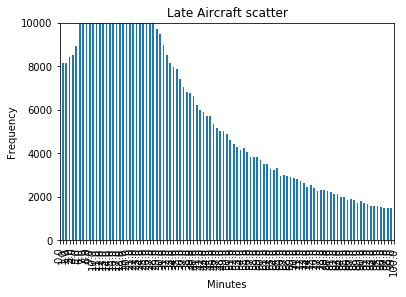

In [19]:
count_late = pd.value_counts(data['LateAircraftDelay'], sort = True).sort_index()
count_late.plot(kind = 'bar')
plt.title("Late Aircraft scatter")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.ylim((0,10000))
plt.xlim((0,100))

In [18]:
late_msk = data['LateAircraftDelay']>=30
ontime_msk = data['LateAircraftDelay']<=30
late = np.zeros_like(data)
ontime = np.zeros_like(data)
late[late_msk] = 1
ontime[ontime_msk] = 0
sum(late)



array([346573, 346573, 346573, 346573, 346573, 346573, 346573, 346573,
       346573, 346573, 346573, 346573, 346573, 346573, 346573, 346573,
       346573, 346573, 346573, 346573, 346573, 346573, 346573, 346573,
       346573, 346573, 346573, 346573, 346573], dtype=object)

In [7]:
outlier_fraction=sum(late)/float(len(ontime))
print(outlier_fraction)

print('Late Arrival:{}'.format(sum(late)))
print('Ontime Arrival:{}'.format(len(ontime)))

[0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892 0.04944171870862892
 0.04944171870862892 0.04944171870862892]
Late Arrival:[346573 346573 346573 346573 346573 346573 346573 346573 346573 346573
 346573 346573 346573 346573 346573 346573 346573 346573 346573 346573
 346573 346573 346573 346573 346573 346573 346573 346573 346573]
Ontime Arrival:7009728
